In [4]:
import os
import h5py
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
data_dir='~/Data/'
import numpy
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


# make sure we're dealing with the most recent version of any code we're using
%load_ext autoreload
%autoreload 2
%cd ~/Data/
%pwd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/jovyan/Data


'/home/jovyan/Data'

In [5]:
%pwd

filename = 'processed_ATL07-01_20181202120647_09910101_001_01.h5'
# See what is in a particular file
# !h5ls -r processed_ATL07-01_20181202120647_09910101_001_01.h5

/home/jovyan/Data
['gt1r', 'gt1l', 'gt2r', 'gt2l', 'gt3r', 'gt3l']


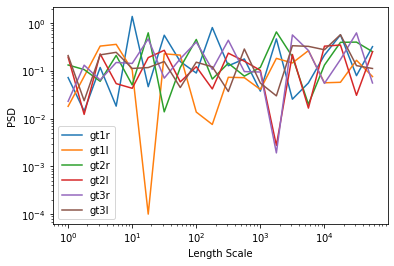

In [14]:
%pwd
!pwd
namer = ['gt1r','gt1l','gt2r','gt2l','gt3r','gt3l']
print(namer)

f = h5py.File(filename, 'r')


[xval,conc,lat,lon,SSH,qual,pgram] = ([] for i in range(7))

for x in range(len(namer)):
    
    # Load in all beams
    xval.append(f[namer[x] + '/sea_ice_segments/seg_dist_x'][:] - f[namer[x] + '/sea_ice_segments/seg_dist_x'][0]) 
    conc.append(f[namer[x] + '/sea_ice_segments/stats/ice_conc'][:])
    lat.append(f[namer[x] + '/sea_ice_segments/latitude'][:])
    lon.append(f[namer[x] + '/sea_ice_segments/longitude'][:])
    SSH.append(f[namer[x] + '/sea_ice_segments/heights/height_segment_height'][:])
    qual.append(f[namer[x] + '/sea_ice_segments/heights/height_segment_fit_quality_flag'][:])
    
xbuckets = numpy.logspace(0, 5, num=20, endpoint=False, base=10.0, dtype=None)
    
for x in range(6):
    
    good = qual[x]>0
    yvec = SSH[x][good]
    xvec = xval[x][good]
    
    pgram.append(scipy.signal.lombscargle(xvec,yvec,xbuckets))
            
    plt.loglog(xbuckets,pgram[x])    

plt.xlabel('Length Scale')      
plt.ylabel('PSD')
plt.legend(namer)
        
    
#plt.scatter(lat,SSH,c=qual); plt.colorbar()

/home/jovyan/Data
['gt1r', 'gt1l', 'gt2r', 'gt2l', 'gt3r', 'gt3l']


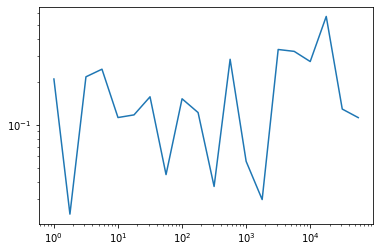

In [34]:
%pwd
!pwd
print(namer)

f2 = h5py.File(filename, 'r')

x2 = numpy.concatenate(xval)
H2 = numpy.concatenate(SSH)

index = numpy.argsort(x2)

sorted_x = x2[index]
sorted_H = H2[index]

good = sorted_H < 1e5
sorted_x = sorted_x[good]
sorted_H = sorted_H[good]

sorted_pgram = scipy.signal.lombscargle(xvec,yvec,xbuckets)


plt.loglog(xbuckets,sorted_pgram)

#plt.scatter(lat,SSH,c=qual); plt.colorbar()